In [130]:
import cooler
import HMMC
import pandas as pd
import bioframe as bf
# from bioframe.util import bedtools
import HMMC

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

import os

mpl.rcParams['font.size'] = 10
saveFigs = True 
if saveFigs == True:
    figure_path = '../figs/supfigs/compare_segmentations/'
    os.makedirs(figure_path, exist_ok=True)
    # to save inkscape-friendly svgs
    new_rc_params = {'text.usetex': False,
                     "svg.fonttype": 'none'}
    mpl.rcParams.update(new_rc_params)

In [194]:
# cooler_file = '/pollard/data/chromatin_organization/rao2014/distiller-0.3.1_hg19/results/mcools/GM12878_inSitu_MboI.hg19.mapq_30.1000.mcool'
cooler_file = '/pollard/data/chromatin_organization/rao2014/distiller-0.3.1_hg19/results/mcools/IMR90_inSitu_MboI.hg19.mapq_30.1000.mcool'


resolution = 50000
cell_line = 'IMR90'
assembly = 'hg19'
hic_cooler = cooler.Cooler(cooler_file+'::resolutions/'+str(resolution))

## Load Bedfiles

In [195]:
# hmmp_bed = '../annotations/GM12878_hg19_25000.bed'
hmmp_bed = '../annotations/IMR90_hg19_10000.bed'
# calder_bed = '../annotations/calder/GM12878_50in100_binsize=40kb.bed'
calder_bed= '../annotations/calder/IMR90_lung_fibroblast_binsize=10kb.bed'
# sniper_bed = '../annotations/sniper/GM12878_track_hg19.bed.gz'
sniper_bed = '../annotations/sniper/IMR90_track_hg19.bed.gz'
# rao_bed = '../annotations/rao/GSE63525_GM12878_subcompartments.bed.gz'

In [196]:
binsize = 5000
chromsizes = bf.fetch_chromsizes(assembly)
chrombins = bf.binnify(chromsizes[:22], binsize=binsize)
chrombins.head()

,chrom,start,end
0,chr1,0,5000
1,chr1,5000,10000
2,chr1,10000,15000
3,chr1,15000,20000
4,chr1,20000,25000


In [197]:
hmmp_df = bf.read_table(hmmp_bed, schema='bed9')
hmmp_binned_df = bin_track(chrombins, hmmp_df, rgb=True)
hmmp_binned_df.head()

,chrom,start,end,name,rgb
0,chr1,0,5000,N,"248,248,248"
1,chr1,5000,10000,N,"248,248,248"
2,chr1,10000,15000,N,"248,248,248"
3,chr1,15000,20000,N,"248,248,248"
4,chr1,20000,25000,N,"248,248,248"


In [198]:
calder_df = bf.read_table(calder_bed, schema='bed12',skiprows=1)
calder_df.name = calder_df.name.apply(lambda x: x[:5])
calder_df.head()

,chrom,start,end,name,score,strand,thickStart,thickEnd,rgb,blockCount,blockSizes,blockStarts
0,chr1,520001,540000,A.1.1,0.989354,.,520001,540000,#FF0000,1,1.0,NaN
1,chr1,560001,570000,A.1.1,0.989354,.,560001,570000,#FF0000,1,1.0,NaN
2,chr1,650001,660000,A.1.1,0.989354,.,650001,660000,#FF0000,1,1.0,NaN
3,chr1,670001,680000,A.1.1,0.989354,.,670001,680000,#FF0000,1,1.0,NaN
4,chr1,690001,1850000,A.1.1,0.989354,.,690001,1850000,#FF0000,1,1.0,NaN


In [199]:
def bin_track(chrombins, bedtrack, columns = ['chrom', 'start', 'end', 'name', 'rgb'], rgb=True):
    binned_track = bf.overlap(df1=chrombins, df2=bedtrack.loc[:, columns], how='left')
    binned_track = binned_track.iloc[:, [0,1,2,6,7]]
    binned_track.columns= columns
    mask = (binned_track.name == '.') | (binned_track.name.isna())
    binned_track.loc[mask, 'name'] = 'N'
    if rgb:
        binned_track.loc[mask, 'rgb'] = '248,248,248'
    else:
        binned_track.loc[mask, 'rgb'] = '#F8F8F8'
        
    return binned_track
    

In [200]:
calder_binned_df = bin_track(chrombins, calder_df, rgb=False)
calder_binned_df.head()

,chrom,start,end,name,rgb
0,chr1,0,5000,N,#F8F8F8
1,chr1,5000,10000,N,#F8F8F8
2,chr1,10000,15000,N,#F8F8F8
3,chr1,15000,20000,N,#F8F8F8
4,chr1,20000,25000,N,#F8F8F8


In [201]:
sniper_df = bf.read_table(sniper_bed, schema='bed9',skiprows=1)
sniper_df.head()

,chrom,start,end,name,score,strand,thickStart,thickEnd,rgb
0,chr1,0,100000,B1,0,.,0,100000,"220,20,60"
1,chr1,100000,200000,B1,0,.,100000,200000,"220,20,60"
2,chr1,200000,300000,B1,0,.,200000,300000,"220,20,60"
3,chr1,300000,400000,B3,0,.,300000,400000,"112,128,144"
4,chr1,400000,500000,B3,0,.,400000,500000,"112,128,144"


In [202]:
sniper_binned_df = bin_track(chrombins, sniper_df, rgb=True)
sniper_binned_df.head()

,chrom,start,end,name,rgb
0,chr1,0,5000,B1,"220,20,60"
1,chr1,5000,10000,B1,"220,20,60"
2,chr1,10000,15000,B1,"220,20,60"
3,chr1,15000,20000,B1,"220,20,60"
4,chr1,20000,25000,B1,"220,20,60"


In [203]:
# rao_df = bf.read_table(rao_bed, schema='bed9')
# rao_binned_df = bin_track(chrombins, rao_df, rgb=True)
# rao_binned_df.head()

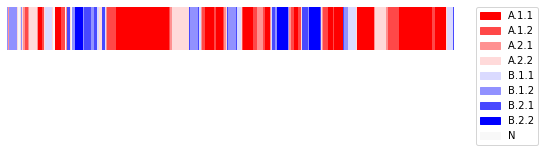

In [204]:
region = 'chr19:7,000,000-20,000,000'
annotation_type = 'calder'
HMMC.plot_bedtrack(calder_binned_df, region, rgb=False, figure_width=8)

if saveFigs:
    plt.savefig(figure_path+'segmap_'+cell_line+'_'+assembly+'_'+annotation_type+'_'+region1.replace(',','')+'.svg', bbox_inches='tight')

/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:200: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.yaxis.set_ticklabels(yticklabels)
/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:205: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(xticklabels)


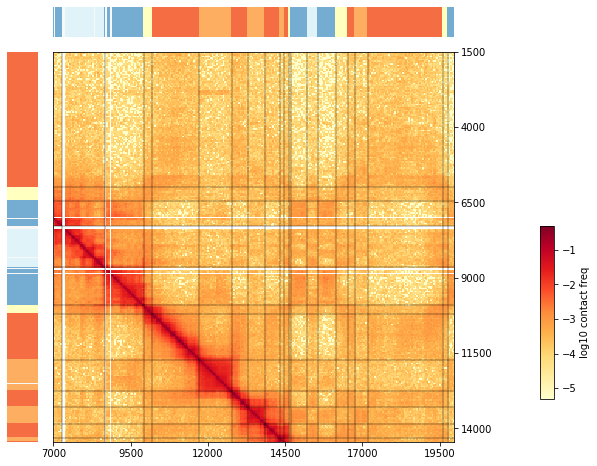

In [205]:
%matplotlib inline
region2 = 'chr19:1,500,000-14,500,000'
region1 = 'chr19:7,000,000-20,000,000'
fig = HMMC.plotmap(hic_cooler, hmmp_binned_df, region1, region2, rgb=True, figure_width=8)
annotation_type = 'HMM3P'

if saveFigs:
    fig.savefig(figure_path+'hicseg_'+cell_line+'_'+assembly+'_'+annotation_type+'_'+region1.replace(',','')+'_'+
                region2.replace(',','')+'.svg',
                bbox_inches="tight")
fig

/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:200: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.yaxis.set_ticklabels(yticklabels)
/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:205: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(xticklabels)


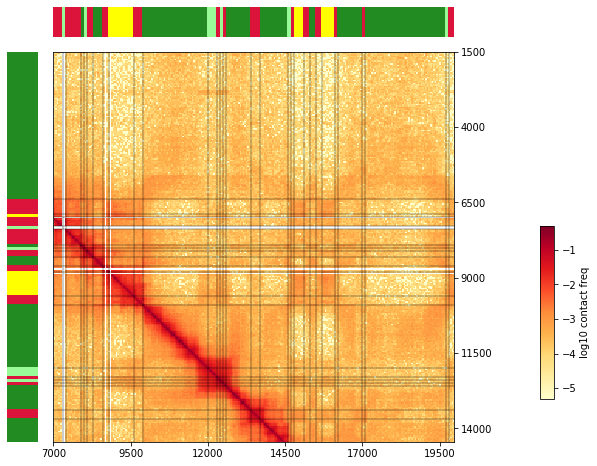

In [206]:
%matplotlib inline
region2 = 'chr19:1,500,000-14,500,000'
region1 = 'chr19:7,000,000-20,000,000'
fig = HMMC.plotmap(hic_cooler, sniper_binned_df, region1, region2, rgb=True, figure_width=8)
annotation_type = 'SNIPER'
if saveFigs:
    fig.savefig(figure_path+'hicseg_'+cell_line+'_'+assembly+'_'+annotation_type+'_'+region1.replace(',','')+'_'+
                region2.replace(',','')+'.svg',
                bbox_inches="tight")
fig

In [207]:
# %matplotlib inline
# region2 = 'chr19:1,500,000-14,500,000'
# region1 = 'chr19:7,000,000-20,000,000'
# fig = HMMC.plotmap(hic_cooler, rao_binned_df, region1, region2, rgb=True, figure_width=8)
# annotation_type = 'Rao'
# if saveFigs:
#     fig.savefig(figure_path+'hicseg_'+cell_line+'_'+assembly+'_'+annotation_type+'_'+region1.replace(',','')+'_'+
#                 region2.replace(',','')+'.svg',
#                 bbox_inches="tight")
# fig

/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:200: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.yaxis.set_ticklabels(yticklabels)
/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:205: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(xticklabels)


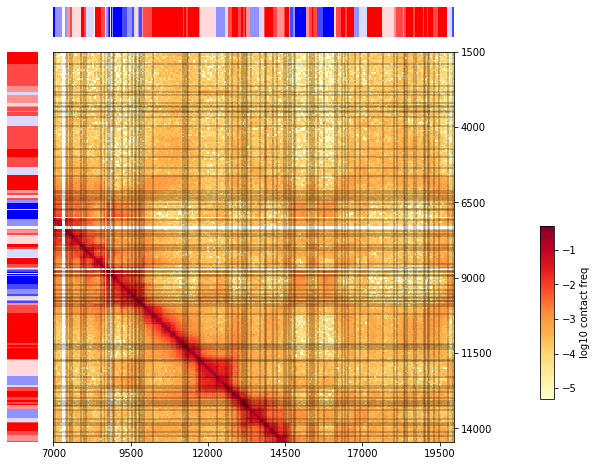

In [208]:
%matplotlib inline
region2 = 'chr19:1,500,000-14,500,000'
region1 = 'chr19:7,000,000-20,000,000'
fig = HMMC.plotmap(hic_cooler, calder_binned_df, region1, region2, rgb=False, figure_width=8)
annotation_type = 'calder'
if saveFigs:
    fig.savefig(figure_path+'hicseg_'+cell_line+'_'+assembly+'_'+annotation_type+'_'+region1.replace(',','')+'_'+
                region2.replace(',','')+'.svg',
                bbox_inches="tight")
fig

/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:200: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.yaxis.set_ticklabels(yticklabels)
/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:205: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(xticklabels)


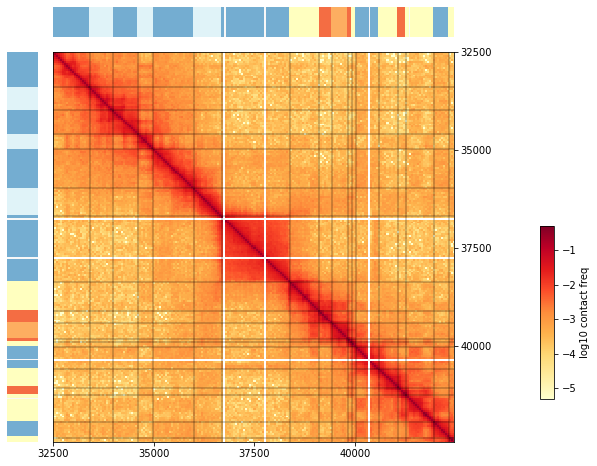

In [209]:
%matplotlib inline
region1 = 'chr19:32,500,000-42,500,000'
region2 = region1
fig = HMMC.plotmap(hic_cooler, hmmp_df, region1, region2, rgb=True, figure_width=8)
annotation_type = 'HMM3P'
if saveFigs:
    fig.savefig(figure_path+'hicseg_'+cell_line+'_'+assembly+'_'+annotation_type+'_'+region1.replace(',','')+'_'+
                region2.replace(',','')+'.svg',
                bbox_inches="tight")
fig

/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:200: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.yaxis.set_ticklabels(yticklabels)
/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:205: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(xticklabels)


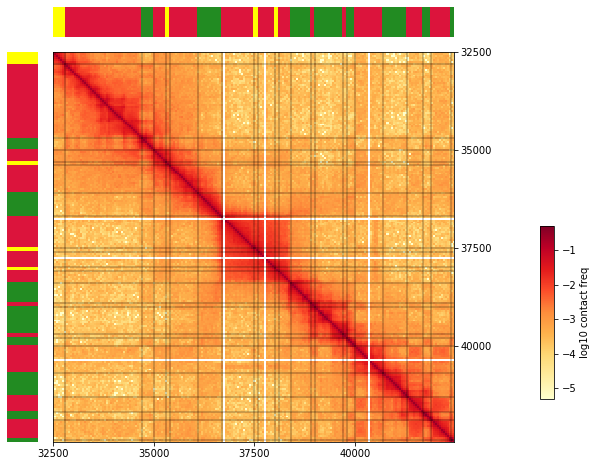

In [210]:
%matplotlib inline
region1 = 'chr19:32,500,000-42,500,000'
region2 = region1
fig = HMMC.plotmap(hic_cooler, sniper_binned_df, region1, region2, rgb=True, figure_width=8)
annotation_type = 'SNIPER'
if saveFigs:
    fig.savefig(figure_path+'hicseg_'+cell_line+'_'+assembly+'_'+annotation_type+'_'+region1.replace(',','')+'_'+
                region2.replace(',','')+'.svg',
                bbox_inches="tight")
fig

In [211]:
# %matplotlib inline
# region1 = region1 = 'chr19:32,500,000-42,500,000'
# region2 = region1
# fig = HMMC.plotmap(hic_cooler, rao_binned_df, region1, region2, rgb=True, figure_width=8)
# annotation_type = 'Rao'
# if saveFigs:
#     fig.savefig(figure_path+'hicseg_'+cell_line+'_'+assembly+'_'+annotation_type+'_'+region1.replace(',','')+'_'+
#                 region2.replace(',','')+'.svg',
#                 bbox_inches="tight")
# fig

/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:200: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.yaxis.set_ticklabels(yticklabels)
/pollard/home/lchumpitaz/Hi-C/testing/HMMC/plotting_tools.py:205: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(xticklabels)


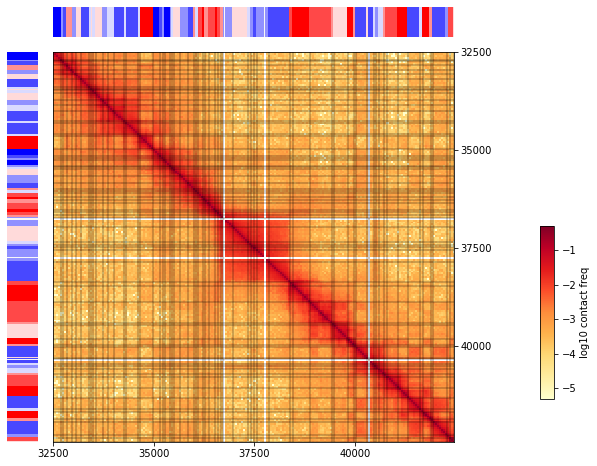

In [212]:
%matplotlib inline
region1 = 'chr19:32,500,000-42,500,000'
region2 = region1
fig = HMMC.plotmap(hic_cooler, calder_binned_df, region1, region2, rgb=False, figure_width=8)
annotation_type = 'calder'
if saveFigs:
    fig.savefig(figure_path+'hicseg_'+cell_line+'_'+assembly+'_'+annotation_type+'_'+region1.replace(',','')+'_'+
                region2.replace(',','')+'.svg',
                bbox_inches="tight")
fig

### Overlap comparison

In [213]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [214]:
hmmp_names = sorted(hmmp_binned_df.name.unique())
# rao_names = sorted(rao_binned_df.name.unique())
calder_names = sorted(calder_binned_df.name.unique())
sniper_names = sorted(sniper_binned_df.name.unique())

In [215]:
def comparison_matrix(track1, track2, track1_names, track2_names):
    labels = track1_names + track2_names[:-1]
    M = confusion_matrix(track1.name, track2.name, labels=labels)
    M1 = M[:len(track1_names)-1, len(track1_names):]
    return M1

In [217]:
# plt.figure(figsize=(8, 5))
# M = comparison_matrix(hmmp_binned_df, rao_binned_df, hmmp_names, rao_names) + 1
# M_expected = np.outer(M.sum(axis=1), M.sum(axis=0))/M.sum()
# sns.heatmap(np.log2(M/M_expected), annot=True,
#            yticklabels=hmmp_names[:-1],
#            xticklabels=rao_names[:-1], cmap='bwr', cbar=True, vmin=-1, vmax=1)
# annotation1 = 'HMM3P'
# annotation2 = 'Rao'
# plt.xlabel(annotation2, fontsize=20)
# plt.ylabel(annotation1, fontsize=20)
# if saveFigs:
#     plt.savefig(figure_path+'hiccomparison_OE_'+cell_line+'_'+assembly+'_'+annotation1+'_'+annotation2+'.svg',
#                 bbox_inches="tight")

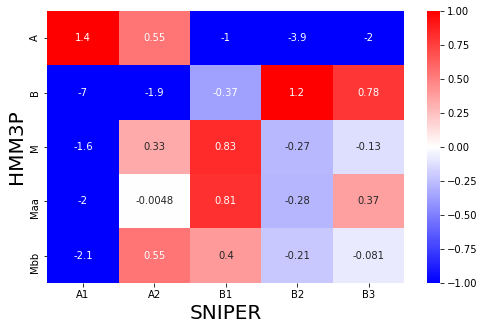

In [218]:
plt.figure(figsize=(8, 5))
M = comparison_matrix(hmmp_binned_df, sniper_binned_df, hmmp_names, sniper_names) + 1
M_expected = np.outer(M.sum(axis=1), M.sum(axis=0))/M.sum()
sns.heatmap(np.log2(M/M_expected), annot=True,
           yticklabels=hmmp_names[:-1],
           xticklabels=sniper_names[:-1], cmap='bwr', cbar=True, vmin=-1, vmax=1)
annotation1 = 'HMM3P'
annotation2 = 'SNIPER'
plt.xlabel(annotation2, fontsize=20)
plt.ylabel(annotation1, fontsize=20)
if saveFigs:
    plt.savefig(figure_path+'hiccomparison_OE_'+cell_line+'_'+assembly+'_'+annotation1+'_'+annotation2+'.svg',
                bbox_inches="tight")

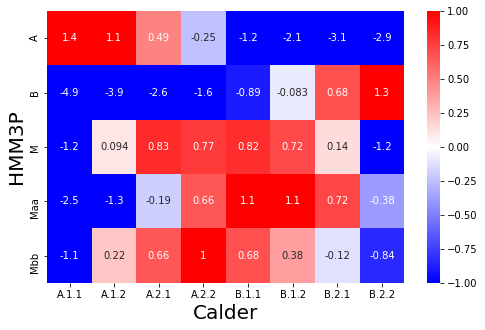

In [220]:
plt.figure(figsize=(8, 5))
M = comparison_matrix(hmmp_binned_df, calder_binned_df, hmmp_names, calder_names) + 1
M_expected = np.outer(M.sum(axis=1), M.sum(axis=0))/M.sum()
sns.heatmap(np.log2(M/M_expected), annot=True,
           yticklabels=hmmp_names[:-1],
           xticklabels=calder_names[:-1], cmap='bwr', cbar=True, vmin=-1, vmax=1)
annotation1 = 'HMM3P'
annotation2 = 'Calder'
plt.xlabel(annotation2, fontsize=20)
plt.ylabel(annotation1, fontsize=20)
if saveFigs:
    plt.savefig(figure_path+'hiccomparison_OE_'+cell_line+'_'+assembly+'_'+annotation1+'_'+annotation2+'.svg',
                bbox_inches="tight")

In [166]:
def compare_segmentations(track1, track2, axis = 1):
    track1_names = sorted(track1.name.unique())
    track2_names = sorted(track2.name.unique())
    labels = track1_names + track2_names[:-1]
    M = confusion_matrix(track1.name, track2.name, labels=labels)
    M1 = M[:len(track1_names)-1, len(track1_names):]
    sns.heatmap(M1/M1.sum(axis=axis, keepdims=True), annot=True,
               yticklabels=track1_names[:-1],
               xticklabels=track2_names[:-1], cmap='YlOrRd', cbar=True)

In [221]:
# plt.figure(figsize=(8, 5))
# M1 = compare_segmentations(hmmp_binned_df, rao_binned_df, axis=0)
# annotation1 = 'HMM3P'
# annotation2 = 'Rao'
# plt.xlabel(annotation2, fontsize=20)
# plt.ylabel(annotation1, fontsize=20)

# if saveFigs:
#     plt.savefig(figure_path+'hiccomparison_'+cell_line+'_'+assembly+'_'+annotation1+'_'+annotation2+'.svg',
#                 bbox_inches="tight")

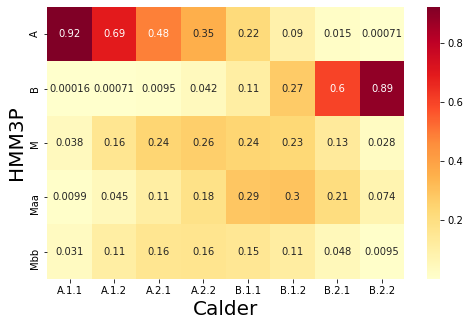

In [164]:
plt.figure(figsize=(8, 5))
compare_segmentations(hmmp_binned_df, calder_binned_df, axis=0)
annotation1 = 'HMM3P'
annotation2 = 'Calder'
plt.xlabel(annotation2, fontsize=20)
plt.ylabel(annotation1, fontsize=20)



if saveFigs:
    plt.savefig(figure_path+'hiccomparison_'+cell_line+'_'+assembly+'_'+annotation1+'_'+annotation2+'.svg',
                bbox_inches="tight")

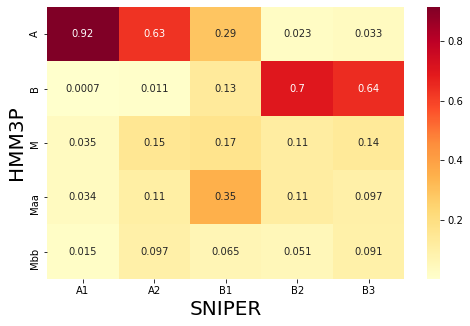

In [165]:
plt.figure(figsize=(8, 5))
compare_segmentations(hmmp_binned_df, sniper_binned_df, axis=0)
annotation1 = 'HMM3P'
annotation2 = 'SNIPER'
plt.xlabel(annotation2, fontsize=20)
plt.ylabel(annotation1, fontsize=20)


if saveFigs:
    plt.savefig(figure_path+'hiccomparison_'+cell_line+'_'+assembly+'_'+annotation1+'_'+annotation2+'.svg',
                bbox_inches="tight")